In [1]:
import pandas as pd
import re
import string
import jieba
import os
import matplotlib
import matplotlib.pyplot as plt
import requests
import csv

In [2]:
# 安裝爬蟲套件
!pip install requests
!pip install beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [37]:
from bs4 import BeautifulSoup

# 要爬取的新聞網址
url = 'https://www.storm.mg/lifestyle/4905182'

In [38]:
# 使用Requests取得網頁內容
response = requests.get(url)
print(response)

<Response [200]>


In [39]:
# 使用Beautiful Soup解析網頁內容
soup = BeautifulSoup(response.text, 'html.parser')

# 找到特定的 <div> 標籤
article_content_div = soup.find('div', class_='article_content_inner')

# 找到在 <div> 標籤內的所有 <p> 標籤，並擁有 aid 屬性的
p_with_aid = article_content_div.find_all('p', {'aid': True})

data_to_write = []
# 取得前四個符合條件的 <p> 標籤的內容
for i in range(4):    
    # 將文章資料存為字典
    data_to_write_info = {
        '新聞內容': p_with_aid[i].text,
    }
    data_to_write.append(data_to_write_info)
    print(p_with_aid[i].text)

重機團體爭取上國道將於26日包圍交通部抗議。交通部長王國材今（13）日表示，有跟地方政府討論，大家都覺得目前不適合，且重機騎車行為讓大家覺得干擾可能很多，加上有6成民眾反對，所以重機上國道還沒有達成共識，暫時沒有時間表。
道路交通處罰條例在101年7月就公告550c.c以上的大型重機可以上高速公路，不過該法規通過12年後，目前僅只有國3甲線有開放重機行駛，其餘高速公路全數禁止。
為了爭取重機上國道等訴求，中華民國大型重機經營同業全國促進會發起26日包圍交通部抗議，目標號召5000台重機、上萬人抗議。立法院交通委員會今天審查113年度中央政府總預算案關於交通部民航局單位預算，邀請王國材列席。
針對重機上國道的進展，王國材在會前受訪表示，重機能否上國道過去經過很多討論，也跟地方政府溝通，但大家都覺得目前還不適合，主要就是在高速公路上，重機騎車的行為讓大家覺得干擾可能非常的多，而且民調有6成民眾都反對，重機上國道還沒有達成共識，暫時沒有時間表。


In [40]:
# 將資料寫入CSV文件
with open('重機上國道.csv', 'w', newline='', encoding='utf-8-sig') as csvfile:
    fieldnames = ['新聞內容']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for data_to_write_info in data_to_write:
        writer.writerow(data_to_write_info)

In [41]:
data = pd.read_csv("重機上國道.csv", encoding='utf-8')

#印出"新聞內容"那一行的內容
print(data['新聞內容'])

0    重機團體爭取上國道將於26日包圍交通部抗議。交通部長王國材今（13）日表示，有跟地方政府討論...
1    道路交通處罰條例在101年7月就公告550c.c以上的大型重機可以上高速公路，不過該法規通過...
2    為了爭取重機上國道等訴求，中華民國大型重機經營同業全國促進會發起26日包圍交通部抗議，目標號...
3    針對重機上國道的進展，王國材在會前受訪表示，重機能否上國道過去經過很多討論，也跟地方政府溝通...
Name: 新聞內容, dtype: object


In [42]:
#將所有文字合併成一個字串
data_string = ' '.join(data['新聞內容'])
data_string

'重機團體爭取上國道將於26日包圍交通部抗議。交通部長王國材今（13）日表示，有跟地方政府討論，大家都覺得目前不適合，且重機騎車行為讓大家覺得干擾可能很多，加上有6成民眾反對，所以重機上國道還沒有達成共識，暫時沒有時間表。 道路交通處罰條例在101年7月就公告550c.c以上的大型重機可以上高速公路，不過該法規通過12年後，目前僅只有國3甲線有開放重機行駛，其餘高速公路全數禁止。 為了爭取重機上國道等訴求，中華民國大型重機經營同業全國促進會發起26日包圍交通部抗議，目標號召5000台重機、上萬人抗議。立法院交通委員會今天審查113年度中央政府總預算案關於交通部民航局單位預算，邀請王國材列席。 針對重機上國道的進展，王國材在會前受訪表示，重機能否上國道過去經過很多討論，也跟地方政府溝通，但大家都覺得目前還不適合，主要就是在高速公路上，重機騎車的行為讓大家覺得干擾可能非常的多，而且民調有6成民眾都反對，重機上國道還沒有達成共識，暫時沒有時間表。'

In [43]:
#使用正則表達式清理字串，將標點符號與數字清掉
cleaned_text = re.sub(r'[0-9a-zA-Z{}，.（）！、「」：？。－／]+'.format(re.escape(string.punctuation)), ' ', data_string)
print(cleaned_text)

重機團體爭取上國道將於 日包圍交通部抗議 交通部長王國材今 日表示 有跟地方政府討論 大家都覺得目前不適合 且重機騎車行為讓大家覺得干擾可能很多 加上有 成民眾反對 所以重機上國道還沒有達成共識 暫時沒有時間表  道路交通處罰條例在 年 月就公告 以上的大型重機可以上高速公路 不過該法規通過 年後 目前僅只有國 甲線有開放重機行駛 其餘高速公路全數禁止  為了爭取重機上國道等訴求 中華民國大型重機經營同業全國促進會發起 日包圍交通部抗議 目標號召 台重機 上萬人抗議 立法院交通委員會今天審查 年度中央政府總預算案關於交通部民航局單位預算 邀請王國材列席  針對重機上國道的進展 王國材在會前受訪表示 重機能否上國道過去經過很多討論 也跟地方政府溝通 但大家都覺得目前還不適合 主要就是在高速公路上 重機騎車的行為讓大家覺得干擾可能非常的多 而且民調有 成民眾都反對 重機上國道還沒有達成共識 暫時沒有時間表 


In [18]:
!pip install jieba

Defaulting to user installation because normal site-packages is not writeable


In [44]:
# 使用jieba進行分詞
tokens = jieba.lcut(cleaned_text)  #此時的type為List

print(tokens)

['重機', '團體', '爭取', '上', '國道將', '於', ' ', '日', '包圍', '交通部', '抗議', ' ', '交通部', '長', '王國材', '今', ' ', '日', '表示', ' ', '有', '跟', '地方', '政府', '討論', ' ', '大家', '都', '覺得', '目前', '不', '適合', ' ', '且', '重機', '騎車', '行為', '讓', '大家', '覺得', '干擾', '可能', '很多', ' ', '加上', '有', ' ', '成民眾', '反對', ' ', '所以', '重機', '上國道', '還沒有', '達', '成共識', ' ', '暫時', '沒有', '時間', '表', ' ', ' ', '道路交通', '處罰', '條例', '在', ' ', '年', ' ', '月', '就', '公告', ' ', '以上', '的', '大型', '重機', '可以', '上', '高速公路', ' ', '不過', '該法', '規通過', ' ', '年', '後', ' ', '目前', '僅', '只有', '國', ' ', '甲線', '有', '開放', '重機', '行駛', ' ', '其餘', '高速公路', '全數', '禁止', ' ', ' ', '為', '了', '爭取', '重機', '上國道', '等', '訴求', ' ', '中華民國', '大型', '重機', '經營', '同業', '全國促', '進會', '發起', ' ', '日', '包圍', '交通部', '抗議', ' ', '目標', '號召', ' ', '台', '重機', ' ', '上萬人', '抗議', ' ', '立法院', '交通委', '員會', '今天', '審查', ' ', '年度', '中央政府', '總', '預算', '案關', '於', '交通部', '民航局', '單位', '預算', ' ', '邀請', '王國材', '列席', ' ', ' ', '針對', '重機', '上國道', '的', '進展', ' ', '王國材', '在', '會', '前', '受訪', '表示', ' ', '重機', '能

In [45]:
# 印出各詞語出現的次數

from collections import Counter

# 使用 Counter 計算詞語出現次數
word_counts = Counter(tokens)

for word, count in word_counts.items():
    print(f"{word}: {count} 次")

重機: 12 次
團體: 1 次
爭取: 2 次
上: 3 次
國道將: 1 次
於: 2 次
 : 43 次
日: 3 次
包圍: 2 次
交通部: 4 次
抗議: 3 次
長: 1 次
王國材: 3 次
今: 1 次
表示: 2 次
有: 4 次
跟: 2 次
地方: 2 次
政府: 2 次
討論: 2 次
大家: 4 次
都: 3 次
覺得: 4 次
目前: 3 次
不: 1 次
適合: 2 次
且: 1 次
騎車: 2 次
行為: 2 次
讓: 2 次
干擾: 2 次
可能: 2 次
很多: 2 次
加上: 1 次
成民眾: 2 次
反對: 1 次
所以: 1 次
上國道: 5 次
還沒有: 2 次
達: 2 次
成共識: 2 次
暫時: 2 次
沒有: 2 次
時間: 2 次
表: 2 次
道路交通: 1 次
處罰: 1 次
條例: 1 次
在: 3 次
年: 2 次
月: 1 次
就: 1 次
公告: 1 次
以上: 1 次
的: 4 次
大型: 2 次
可以: 1 次
高速公路: 3 次
不過: 1 次
該法: 1 次
規通過: 1 次
後: 1 次
僅: 1 次
只有: 1 次
國: 1 次
甲線: 1 次
開放: 1 次
行駛: 1 次
其餘: 1 次
全數: 1 次
禁止: 1 次
為: 1 次
了: 1 次
等: 1 次
訴求: 1 次
中華民國: 1 次
經營: 1 次
同業: 1 次
全國促: 1 次
進會: 1 次
發起: 1 次
目標: 1 次
號召: 1 次
台: 1 次
上萬人: 1 次
立法院: 1 次
交通委: 1 次
員會: 1 次
今天: 1 次
審查: 1 次
年度: 1 次
中央政府: 1 次
總: 1 次
預算: 2 次
案關: 1 次
民航局: 1 次
單位: 1 次
邀請: 1 次
列席: 1 次
針對: 1 次
進展: 1 次
會: 1 次
前: 1 次
受訪: 1 次
能否: 1 次
過去: 1 次
經過: 1 次
也: 1 次
溝通: 1 次
但: 1 次
還不: 1 次
主要: 1 次
就是: 1 次
非常: 1 次
多: 1 次
而且: 1 次
民調: 1 次
反: 1 次
對: 1 次


In [22]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [46]:
from wordcloud import WordCloud

# 設定中文字體路徑
font_path = "C:/Windows/Fonts/mingliu.ttc"

wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(word_counts)

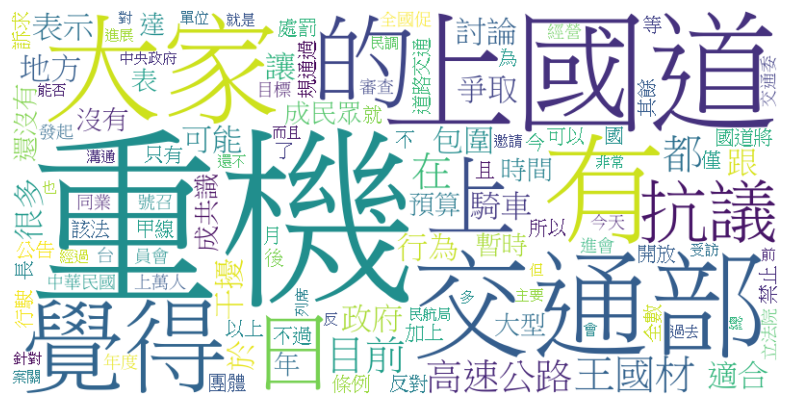

In [47]:
# 顯示生成的文字雲
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
S